In [1]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ev_charging_patterns.csv")
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [3]:
print("Shape:", df.shape)

Shape: (1320, 20)


In [4]:
print("\nColumns:")
print(df.columns)


Columns:
Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')


In [5]:
df.describe()


,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [6]:
#data overview
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [7]:
df.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [8]:
#selecting final features
df = df[
    [
        'Charging Start Time',
        'Charging Duration (hours)',
        'Energy Consumed (kWh)'
    ]
]

In [9]:
#date time conversion
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])


In [10]:
#feature engineering
df['arrival_hour'] = df['Charging Start Time'].dt.hour
df[['Charging Start Time', 'arrival_hour']].head()


,Charging Start Time,arrival_hour
0,2024-01-01 00:00:00,0
1,2024-01-01 01:00:00,1
2,2024-01-01 02:00:00,2
3,2024-01-01 03:00:00,3
4,2024-01-01 04:00:00,4


In [11]:
#data cleaning
df = df.dropna()
df = df[df['Charging Duration (hours)'] > 0]
df = df[df['Energy Consumed (kWh)'] > 0]


In [12]:
df.shape
df.isnull().sum()

Charging Start Time          0
Charging Duration (hours)    0
Energy Consumed (kWh)        0
arrival_hour                 0
dtype: int64

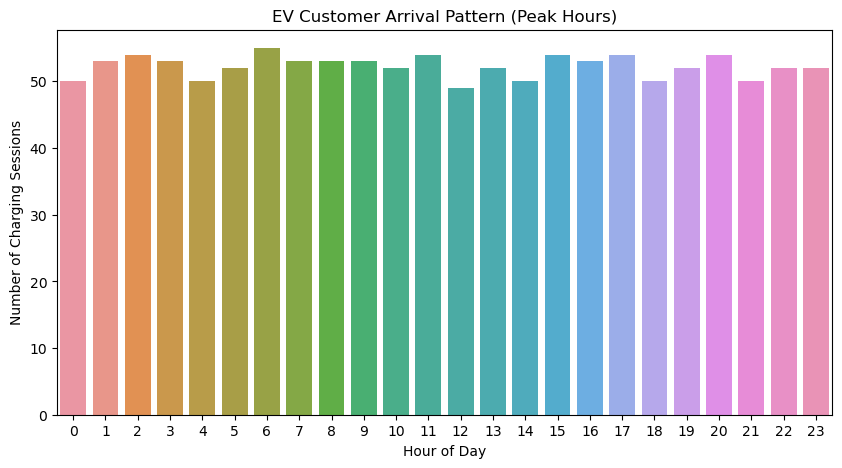

In [13]:
#peak hour analysis
hourly_counts = df['arrival_hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Charging Sessions")
plt.title("EV Customer Arrival Pattern (Peak Hours)")
plt.show()



In [14]:
#prepare ml features
X = df[
    [
        'arrival_hour',
        'Charging Duration (hours)',
        'Energy Consumed (kWh)'
    ]
]


In [15]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


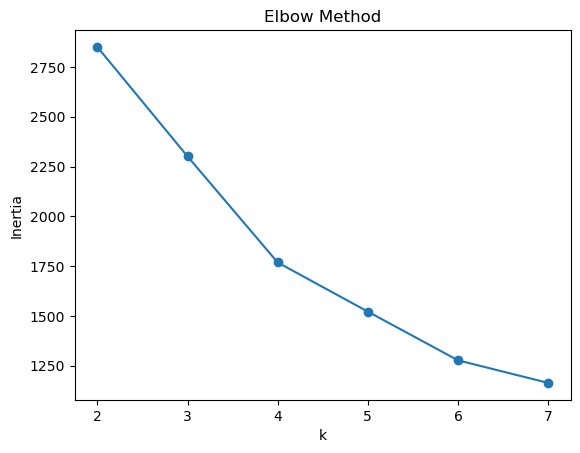

In [16]:
#k selection(elbow method)

inertia = []
k_range = range(2, 8)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [17]:
#different values for different k

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={score}")


k=2, Silhouette Score=0.23730866555210955
k=3, Silhouette Score=0.23397027075282312
k=4, Silhouette Score=0.2764204518663635
k=5, Silhouette Score=0.2670034490266042
k=6, Silhouette Score=0.2827644483738953
k=7, Silhouette Score=0.2670834936341574


In [18]:
#final k-means model for k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [19]:
#SILHOUETTE SCORES
sil_score=silhouette_score(X_scaled,df['cluster'])
print(f'Silhouette Score:{sil_score}')

Silhouette Score:0.2764204518663635


In [20]:
#cluster interpretation
df.groupby('cluster')[
    [
        'arrival_hour',
        'Charging Duration (hours)',
        'Energy Consumed (kWh)'
    ]
].mean()


,arrival_hour,Charging Duration (hours),Energy Consumed (kWh)
cluster,,,
0,5.977273,1.387745,54.105255
1,14.781457,3.120534,63.391100
2,6.506757,3.024089,25.020103
3,17.709770,1.702366,29.481920


In [25]:
#urgent vs flexible users
# Map cluster numbers to customer type based on analysis
cluster_to_type = {
    0: 'Urgent (Immediate Charging)',
    1: 'Flexible (Can Extend Charging)',
    2: 'Flexible (Can Extend Charging)',
    3: 'Urgent (Immediate Charging)'
}

# Create new column
df['customer_type'] = df['cluster'].map(cluster_to_type)

# Check counts
df['customer_type'].value_counts()


customer_type
Urgent (Immediate Charging)       656
Flexible (Can Extend Charging)    598
Name: count, dtype: int64

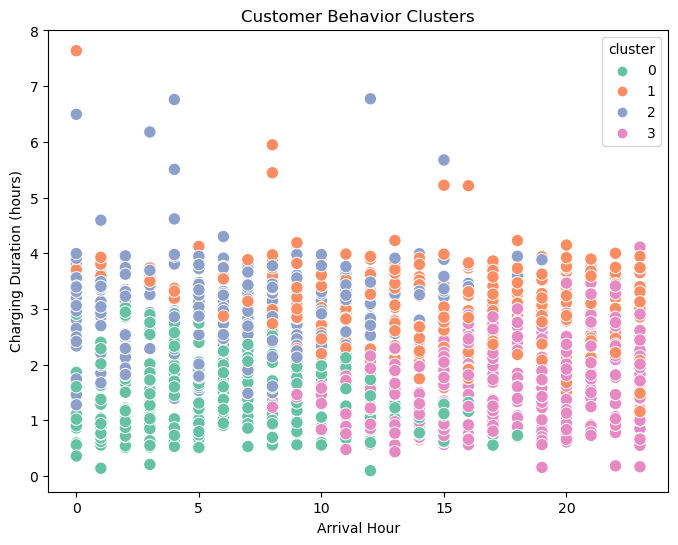

In [22]:
#final scatterplot(presentation plot)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['arrival_hour'],
    y=df['Charging Duration (hours)'],
    hue=df['cluster'],
    palette='Set2',
    s=80
)
plt.xlabel("Arrival Hour")
plt.ylabel("Charging Duration (hours)")
plt.title("Customer Behavior Clusters")
plt.show()


In [26]:
output_df = df[
    [
        'arrival_hour',
        'Charging Duration (hours)',
        'Energy Consumed (kWh)',
        'cluster',
        'customer_type'
    ]
]

output_df.to_csv("customer_behavior_output.csv", index=False)
output_df.head()


,arrival_hour,Charging Duration (hours),Energy Consumed (kWh),cluster,customer_type
0,0,0.591363,60.712346,0,Urgent (Immediate Charging)
1,1,3.133652,12.339275,2,Flexible (Can Extend Charging)
2,2,2.452653,19.128876,2,Flexible (Can Extend Charging)
3,3,1.266431,79.457824,0,Urgent (Immediate Charging)
4,4,2.019765,19.629104,2,Flexible (Can Extend Charging)


In [27]:
import joblib

best_model = kmeans
joblib.dump(best_model, "customer_behavior_kmeans_model.joblib")
joblib.dump(scaler, "customer_behavior_scaler.joblib")
print("Scaler saved as 'customer_behavior_scaler.joblib'.")
print("Best model saved as 'customer_behavior_kmeans_model.joblib'.")


Scaler saved as 'customer_behavior_scaler.joblib'.
Best model saved as 'customer_behavior_kmeans_model.joblib'.
